In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -RT '/content/gdrive/My Drive/Space/msl-images' /

In [4]:
!cp -R '/content/gdrive/My Drive/Space/models' /

In [5]:
import os
os.getcwd()
os.chdir("../")

In [6]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=d67c78ff16e4a3cd245a231db1d61ce8a86466d99bd8cc76dfd223bc437eee2a
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import tarfile
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os

import os
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from models import resnet_v1, resnet_v2

In [9]:
import pandas as pd 
train = pd.read_csv("train-calibrated-shuffled.txt", sep=" ", header=None)
train.columns=['id','label']
train.head()

,id,label
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [10]:
test = pd.read_csv("test-calibrated-shuffled.txt", sep=" ")
test.columns=['id','label']
test.head()

,id,label
0,calibrated/0640MH0002640000203781I01_DRCL.JPG,24
1,calibrated/0647MH0003250050203806E01_DRCL.JPG,9
2,calibrated/0844MR0037590000501001I01_DRCL.JPG,7
3,calibrated/0618MR0026460020401253I01_DRCL.JPG,11
4,calibrated/0605MH0003060010203269I01_DRCL.JPG,8


In [11]:
val = pd.read_csv("val-calibrated-shuffled.txt", sep=" ")
val.columns=['id','label']
val.head()

,id,label
0,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
1,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
2,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
3,calibrated/0292MH0002810020103613C00_DRCL.JPG,5
4,calibrated/0552MH0002620000201620I01_DRCL.JPG,24


In [7]:
!rm -rf /aboli
!mkdir /aboli
!mkdir /aboli/train
!mkdir /aboli/test
!mkdir /aboli/val
!mkdir /aboli/train/class_0
!mkdir /aboli/train/class_1
!mkdir /aboli/train/class_2
!mkdir /aboli/train/class_3
!mkdir /aboli/train/class_4
!mkdir /aboli/train/class_5
!mkdir /aboli/train/class_6
!mkdir /aboli/train/class_7
!mkdir /aboli/train/class_8
!mkdir /aboli/train/class_9
!mkdir /aboli/train/class_10
!mkdir /aboli/train/class_11
!mkdir /aboli/train/class_12
!mkdir /aboli/train/class_13
!mkdir /aboli/train/class_14
!mkdir /aboli/train/class_15
!mkdir /aboli/train/class_16
!mkdir /aboli/train/class_17
!mkdir /aboli/train/class_18
!mkdir /aboli/train/class_19
!mkdir /aboli/train/class_20
!mkdir /aboli/train/class_21
!mkdir /aboli/train/class_23
!mkdir /aboli/train/class_24
!mkdir /aboli/test/class_0
!mkdir /aboli/test/class_1
!mkdir /aboli/test/class_2
!mkdir /aboli/test/class_3
!mkdir /aboli/test/class_4
!mkdir /aboli/test/class_5
!mkdir /aboli/test/class_6
!mkdir /aboli/test/class_7
!mkdir /aboli/test/class_8
!mkdir /aboli/test/class_9
!mkdir /aboli/test/class_10
!mkdir /aboli/test/class_11
!mkdir /aboli/test/class_12
!mkdir /aboli/test/class_13
!mkdir /aboli/test/class_14
!mkdir /aboli/test/class_15
!mkdir /aboli/test/class_16
!mkdir /aboli/test/class_17
!mkdir /aboli/test/class_18
!mkdir /aboli/test/class_19
!mkdir /aboli/test/class_20
!mkdir /aboli/test/class_21
!mkdir /aboli/test/class_23
!mkdir /aboli/test/class_24
!mkdir /aboli/val/class_0
!mkdir /aboli/val/class_1
!mkdir /aboli/val/class_2
!mkdir /aboli/val/class_3
!mkdir /aboli/val/class_4
!mkdir /aboli/val/class_5
!mkdir /aboli/val/class_6
!mkdir /aboli/val/class_7
!mkdir /aboli/val/class_8
!mkdir /aboli/val/class_9
!mkdir /aboli/val/class_10
!mkdir /aboli/val/class_11
!mkdir /aboli/val/class_12
!mkdir /aboli/val/class_13
!mkdir /aboli/val/class_14
!mkdir /aboli/val/class_15
!mkdir /aboli/val/class_16
!mkdir /aboli/val/class_17
!mkdir /aboli/val/class_18
!mkdir /aboli/val/class_19
!mkdir /aboli/val/class_20
!mkdir /aboli/val/class_21
!mkdir /aboli/val/class_23
!mkdir /aboli/val/class_24

In [12]:
import os,shutil

x = 0

for i in train.index:
  try:
    fileo = '/' + str(train.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/train/class_" + str(train.at[i,"label"]) + "/")
  except:
    print( str(train.at[i,"id"]))

x = 0
for i in test.index:
  try:
    fileo = '/' + str(test.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/test/class_" + str(test.at[i,"label"]) + "/")
  except:
    print( str(test.at[i,"id"]))

x = 0
for i in val.index:
  try:
    fileo = '/' + str(val.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/val/class_" + str(val.at[i,"label"]) + "/")
  except:
    print( str(val.at[i,"id"]))

train_dir = os.path.dirname('/aboli/train/')
test_dir = os.path.dirname('/aboli/test/')
val_dir = os.path.dirname('/aboli/val/')
## Generators ##
 
train_datagen = ImageDataGenerator(
    rescale = 1./255,

)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
)


train_dataset = train_datagen.flow_from_directory(
    train_dir,
    #class_mode='binary',
    class_mode='categorical',
    batch_size = 32,
    shuffle=True,
    target_size = (224, 224)
)

valid_dataset = val_datagen.flow_from_directory(
    val_dir,
    #class_mode='binary',
    class_mode='categorical',
    batch_size = 32,
    shuffle=False,
    target_size = (224, 224)
)

test_dataset = test_datagen.flow_from_directory(
    test_dir,
    #class_mode='binary',
    class_mode='categorical',
    batch_size = 32,
    shuffle=False,
    target_size = (224, 224)
)

Found 3746 images belonging to 24 classes.
Found 1639 images belonging to 24 classes.
Found 1304 images belonging to 24 classes.


In [ ]:
# define model
input_shape = (224,224,3)
depth = 20 # For ResNet, specify the depth (e.g. ResNet50: depth=50)
num_classes = 24
attention_module = 'cbam_block'
model = resnet_v1.resnet_v1(input_shape=input_shape, depth=depth, num_classes=num_classes, attention_module=attention_module)
# model = resnet_v2.resnet_v2(input_shape=input_shape, depth=depth, num_classes=num_classes, attention_module=attention_module)   
# model = inception_v3.InceptionV3(input_shape=input_shape, classes=num_classes, attention_module=attention_module)

model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_resent20_cbam.png', show_shapes=True)

In [16]:
from keras.optimizers import SGD, Adam
import numpy
sgd = SGD(lr=0.0001, decay=1e-7, momentum=.9)
adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [17]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.00001)
logs = TensorBoard(log_dir='./logs')

cb_checkpointer = ModelCheckpoint(filepath = 'resnetv1_checkpoint.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max')

In [ ]:
history = model.fit(train_dataset, validation_data=valid_dataset , epochs = 10, callbacks=[cb_checkpointer, learning_rate_reduction, logs])

Epoch 1/10
 10/118 [=>............................] - ETA: 27:15 - loss: 4.5274 - accuracy: 0.0620

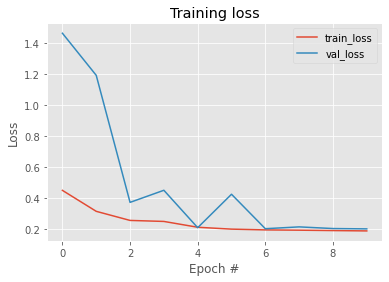

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
N = np.arange(0, 10)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.show()

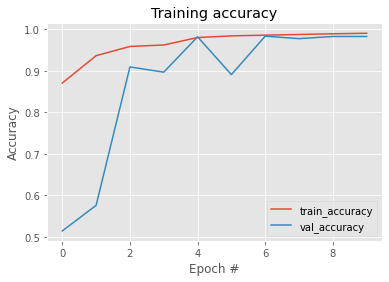

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
N = np.arange(0, 10)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['accuracy'], label='train_accuracy')
plt.plot(N, history.history['val_accuracy'], label='val_accuracy')
plt.title('Training accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(test_dl, batch_size=32)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

In [ ]:
evaluate(model, val_dl)

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
%%time
try3 = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
evaluate(model, train_dl)

In [ ]:
evaluate(model, val_dl)

In [ ]:
evaluate(model, test_dl)

In [ ]:
def plot_accuracies(try3):
    accuracies = [x['val_acc'] for x in try3]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(try3)

In [ ]:
def plot_losses(try3):
    train_losses = [x.get('train_loss') for x in try3]
    val_losses = [x['val_loss'] for x in try3]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
plot_losses(try3)

In [ ]:
from sklearn import metrics as sk_metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

y_pred = []
y_valid = []
for ind, batch in enumerate(test_dl):
    pred_probs = model(batch[0])
    y_pred.extend(pred_probs.argmax(axis=-1).cpu().numpy())
    y_valid.extend(batch[1])

# Calculate needed metrics
print(f'Accuracy score on test data:\t{sk_metrics.accuracy_score(y_valid, y_pred)}')
print(f'Macro F1 score on test data:\t{sk_metrics.f1_score(y_valid, y_pred, average="macro")}')

In [ ]:
# Calculate confusion matrix
labels = ["apxs","apxs cal target","chemcam cal target","chemin inlet open","drill","drill holes","drt front","drt side","ground","horizon","inlet","mahli","mahli cal target","mastcam","mastcam cal target","observation tray","portion box","portion tube","portion tube opening","rems uv sensor","rover rear deck","scoop","turret","wheel"]
confusion_matrix = sk_metrics.confusion_matrix(y_valid, y_pred)
df_confusion_matrix = pd.DataFrame(confusion_matrix,index=labels,columns=labels)

# Show confusion matrix
plt.figure(figsize=(12, 12))
sn.heatmap(df_confusion_matrix, annot=True, cbar=False, cmap='Oranges', linewidths=1, linecolor='black')
plt.xlabel('Predicted labels', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('True labels', fontsize=15)
plt.yticks(fontsize=12);

In [ ]:
cm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
accuracies = cm.diagonal()
list_acc =  accuracies.tolist()
list_acc.append(0)
list_acc.append(0)
list_acc.append(0)

report = classification_report(y_valid, y_pred,                        
                               output_dict=True,
                               target_names=labels)
report_df = pd.DataFrame(report).transpose()
report_df["accuracy"] = list_acc
pd.set_option("display.max_rows", None)
report_df.head(134)